Step 2. 
Get the dataGet the data
Convert the data to a format you can easily manipulate (without changing the data itself).

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import parker


In [42]:
# Read the CSV file
dataset = pd.read_csv('Data/50_Startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [43]:
# Extracting possible features: R&D Spend, Administration, Marketing Spend & State
X = dataset.iloc[:, :-1].values

# Extraction labels: Profit
y = dataset.iloc[:, 4].values

In [56]:
# Check the size and type of data (time series, sample, geographical, etc.).
print('Data set info:')
dataset.info()

print('States with count:')
print(dataset["State"].value_counts())

print('Data set type:')
print(type(dataset))

print('Data set description:')
print(dataset.describe())

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
States with count:
New York      17
California    17
Florida       16
Name: State, dtype: int64
Data set type:
<class 'pandas.core.frame.DataFrame'>
Data set description:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.

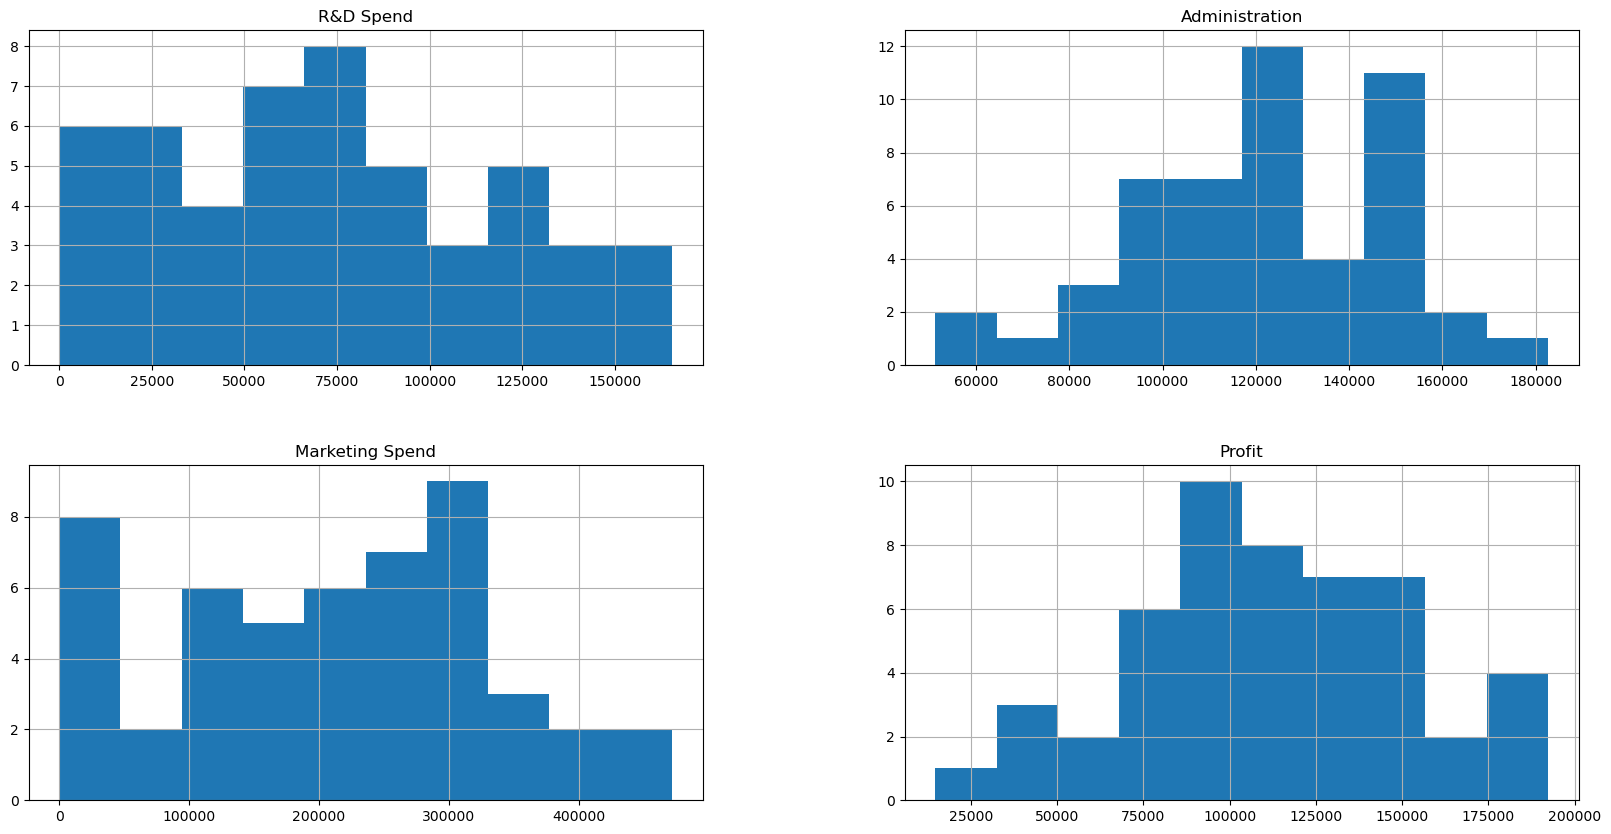

<Figure size 2000x1000 with 0 Axes>

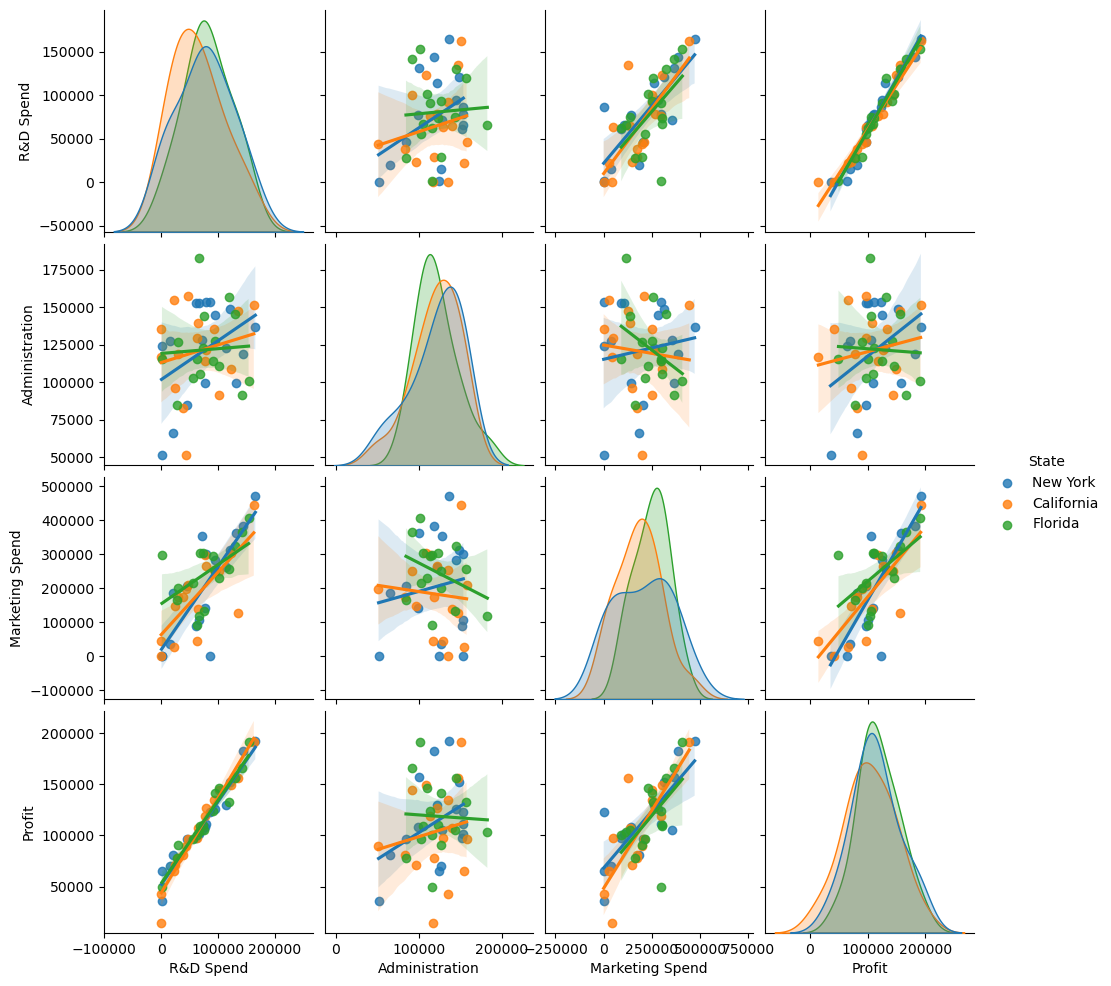

In [63]:
import matplotlib.pyplot as plt
# Visualize the data
import seaborn as sns
dataset.hist(figsize=(20,10))

# Seaborn
plt.figure(figsize=(20,10))
sns.pairplot(data=dataset,hue='State',kind='reg')

plt.show()

The analysis of 50 startups revealed that Research and Development expenses have a positive impact on profit in all states. This was demonstrated by different colored regression lines in the plot.

In terms of Administration expenses, the impact on profit is positive in New York and moderately positive in California, but shows a low degree of negativity in the state of Florida.

The impact of Marketing expenditure on profit is positive in all three states.

Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook.


In [55]:
train_set, test_set = parker.shuffle_and_split_data(dataset, 0.2)

print(len(train_set))

print(len(test_set))

print(test_set)

40
10
    R&D Spend  Administration  Marketing Spend       State     Profit
37   44069.95        51283.14        197029.42  California   89949.14
33   55493.95       103057.49        214634.81     Florida   96778.92
24   77044.01        99281.34        140574.81    New York  108552.04
3   144372.41       118671.85        383199.62    New York  182901.99
49       0.00       116983.80         45173.06  California   14681.40
23   67532.53       105751.03        304768.73     Florida  108733.99
47       0.00       135426.92             0.00  California   42559.73
8   120542.52       148718.95        311613.29    New York  152211.77
13   91992.39       135495.07        252664.93  California  134307.35
31   61136.38       152701.92         88218.23    New York   97483.56
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51     

In [47]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

print(len(train_set))

print(len(test_set))

print(test_set)

40
10
    R&D Spend  Administration  Marketing Spend       State     Profit
2   153441.51       101145.55        407934.54     Florida  191050.39
6   134615.46       147198.87        127716.82  California  156122.51
27   72107.60       127864.55        353183.81    New York  105008.31
48     542.05        51743.15             0.00    New York   35673.41
26   75328.87       144135.98        134050.07     Florida  105733.54
5   131876.90        99814.71        362861.36    New York  156991.12
3   144372.41       118671.85        383199.62    New York  182901.99
41   27892.92        84710.77        164470.71     Florida   77798.83
32   63408.86       129219.61         46085.25  California   97427.84
18   91749.16       114175.79        294919.57     Florida  124266.90


In [68]:
#define OHT and fit transform
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse=False)
transformed=ohe.fit_transform(dataset[['State']])
ohe.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [71]:
#adding transformed values to df
dataset[ohe.categories_[0]]=transformed
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


In [73]:
#set X aand drop orginal state column and label 
X=dataset.drop(['Profit','State'],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [74]:
#set Y column
y=dataset['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [76]:
#splitting data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(40, 6)
(10, 6)


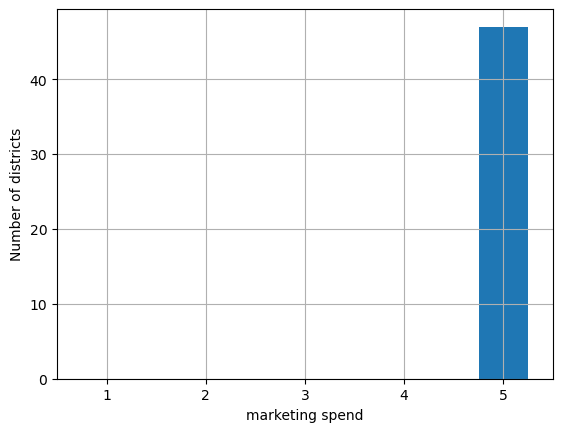

In [ ]:
dataset["Marketing Spend"] = pd.cut(dataset["Marketing Spend"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
 
 
dataset["Marketing Spend"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("marketing spend")
plt.ylabel("Number of districts")
plt.show()



In [ ]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(dataset, dataset["Marketing Spend"]):
    strat_train_set_n = dataset.iloc[train_index]
    strat_test_set_n = dataset.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])